In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
from scipy import stats
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import missingno as mn

**EDA - Exploratory data analysis**

In [ ]:
table = pd.read_csv('creditcard.csv')

In [ ]:
table.isnull().sum().all()

In [89]:
table.isnull().sum().sum()

0

In [90]:
table.isnull().sum().sum()

0

Null elements are not present in the dataset

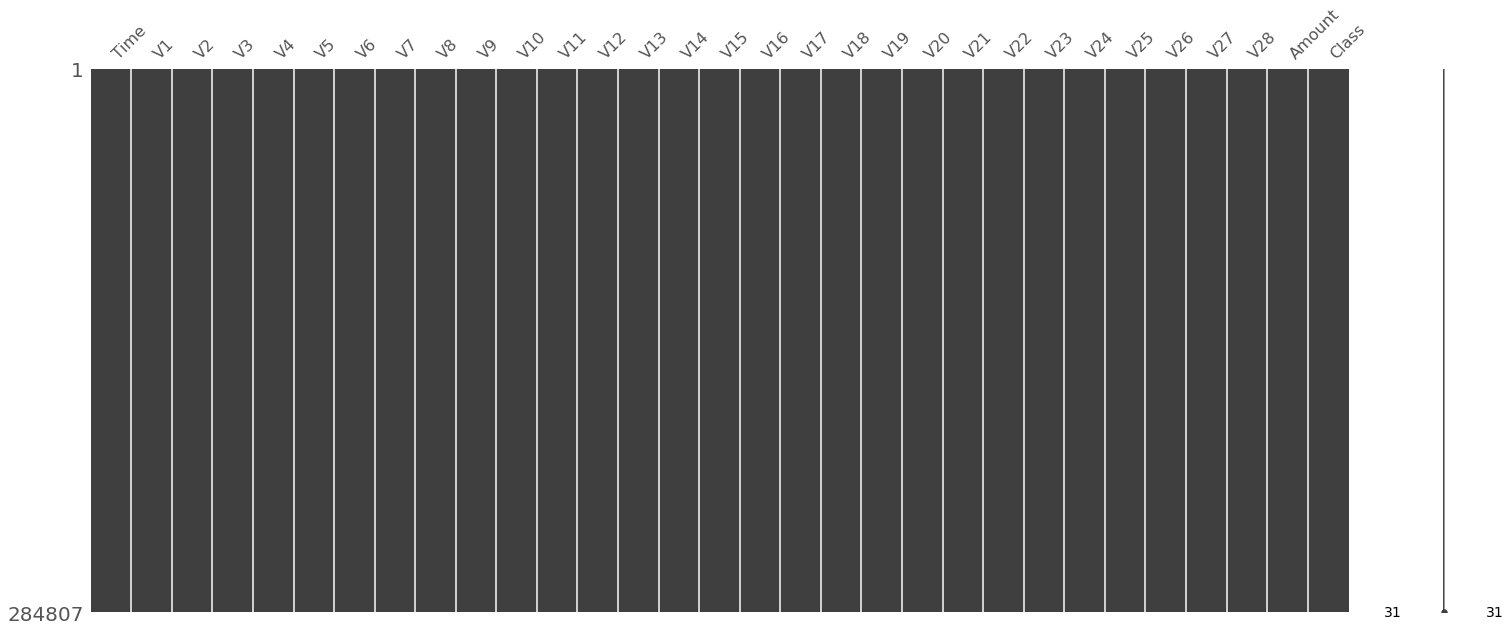

In [92]:
mn.matrix(table);

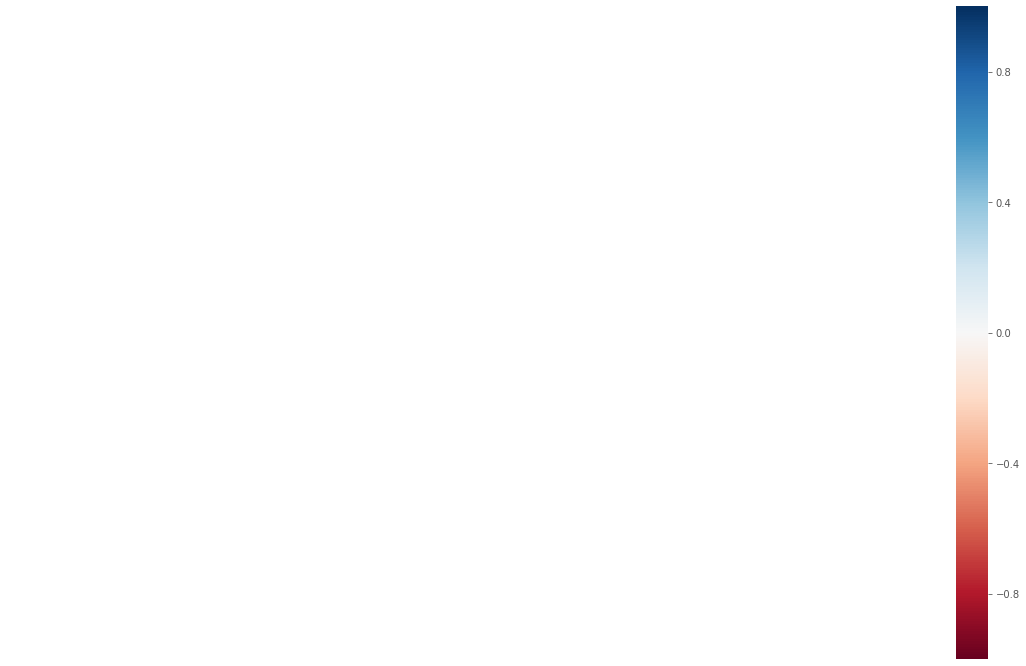

In [93]:
mn.heatmap(table)

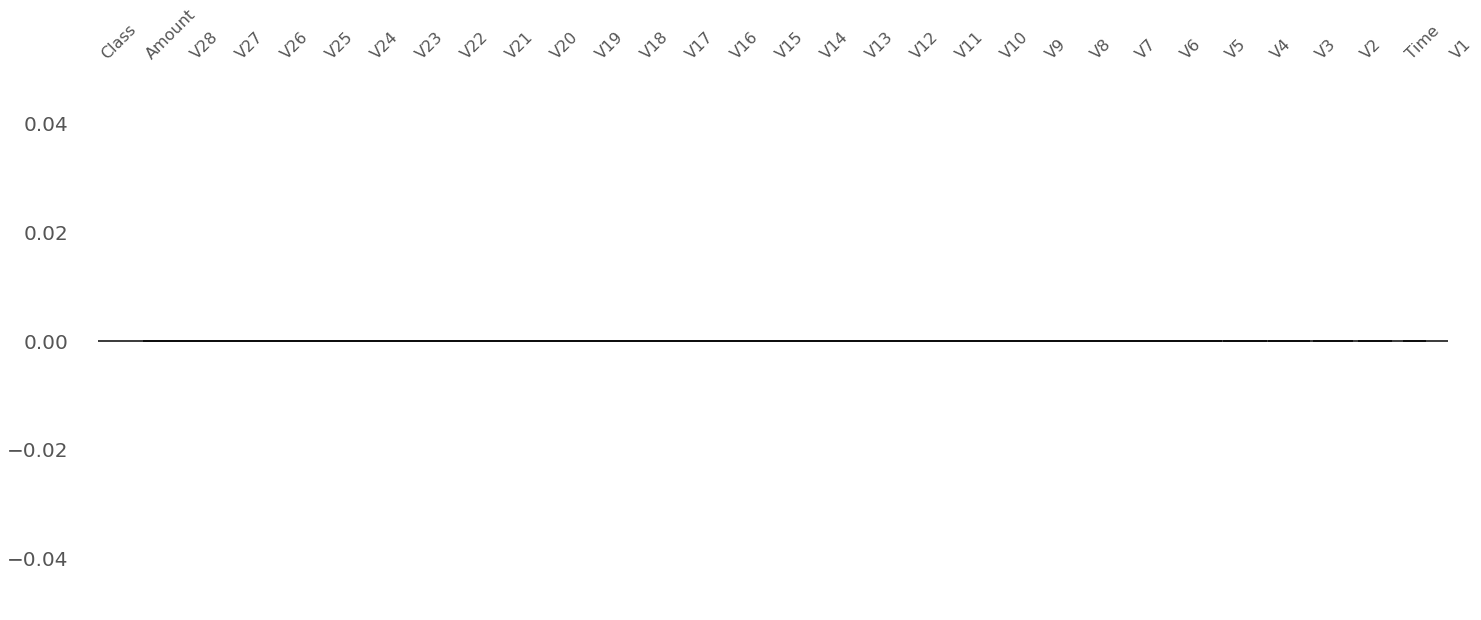

In [94]:
mn.dendrogram(table);

In [95]:
table.head().transpose()

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [96]:

table.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [97]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [98]:
table.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Imbalance class

In [99]:
print ('The number of normal transactions : ' + str(sum(table.Class == 0)))
print ('The number of frauds : ' + str(sum(table.Class == 1)))
print ('The percentage of fraud of all transactions : ' + str(float(sum(table.Class == 1))/float(len(table.Class))*100.0))

The number of normal transactions : 284315
The number of frauds : 492
The percentage of fraud of all transactions : 0.1727485630620034


In [100]:
pd.value_counts(table['Class'])

0    284315
1       492
Name: Class, dtype: int64

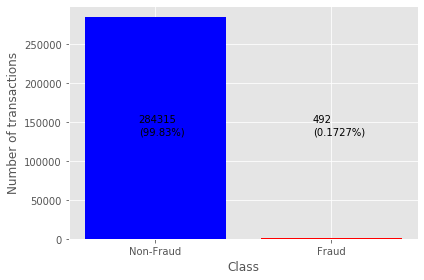

In [101]:
plt.bar(['Non-Fraud','Fraud'], table['Class'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(table['Class'].value_counts()[0], 
                                         table['Class'].value_counts()[0]/table['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(table['Class'].value_counts()[1], 
                                         table['Class'].value_counts()[1]/table['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

The dataset has two classes - Fraud or Non-fraud. The classes are highly imbalanced with 99.83% of observations belonging to non-fradulent transactios and only 0.17% of observations labeled as fradulent. This is an issue and will be addressed with a method for balancing classes


In [102]:
100000/(1440*24)

2.8935185185185186

In [103]:
100000

100000

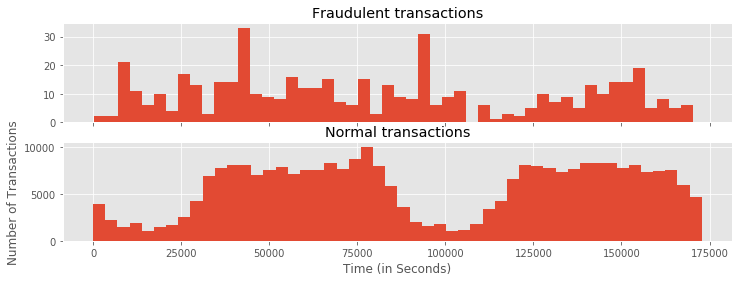

In [104]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(table.Time[table.Class == 1], bins = bins)
ax1.set_title('Fraudulent transactions')

ax2.hist(table.Time[table.Class == 0], bins = bins)
ax2.set_title('Normal transactions')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

Let's see if the transaction amount differs between the two types - Fraud / Normal

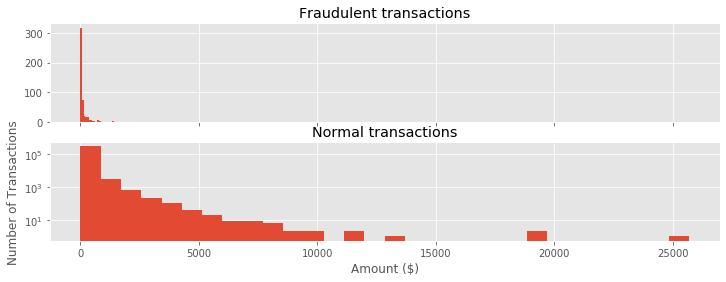

In [105]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(table.Amount[table.Class == 1], bins = bins)
ax1.set_title('Fraudulent transactions')

ax2.hist(table.Amount[table.Class == 0], bins = bins)
ax2.set_title('Normal transactions')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

![alt text](https://www.itl.nist.gov/div898/handbook/apr/section1/eqns/lnpdf.gif)

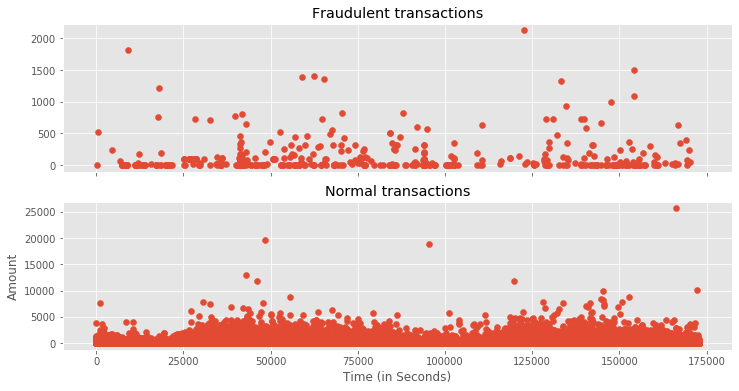

In [106]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(table.Time[table.Class == 1], table.Amount[table.Class == 1])
ax1.set_title('Fraudulent transactions')

ax2.scatter(table.Time[table.Class == 0], table.Amount[table.Class == 0])
ax2.set_title('Normal transactions')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

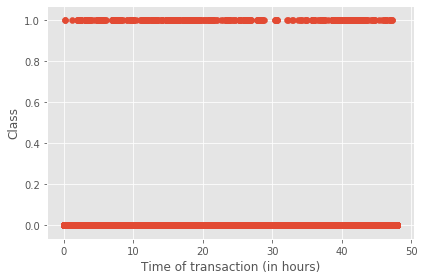

In [107]:
plt.scatter(table['Time']/(60*60), table['Class'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Class')

plt.tight_layout()
plt.show()

The data was collected over the period of 2 days and, apparently, the 'Time' variable isn't a good predictor for frauds. As seen above, the pattern for both non-fradulent and fraudulent transactions seems to be random regarding the hour of the day.

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


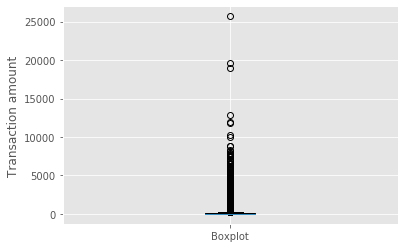

In [108]:
plt.boxplot(table['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = table[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

The interquartile range method found 31904 outliers, which represents 11.2% of the observations. Removing them from the dataset would be a bad idea due to the loss of a large amount of information for the machine learning models.

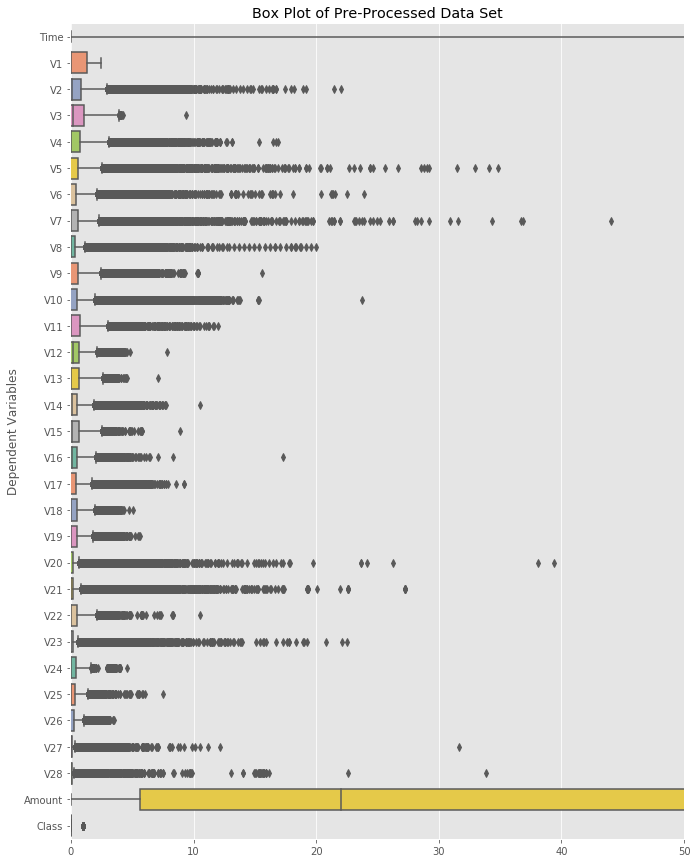

In [139]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set(xlim=(-.05, 50))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = table, 
  orient = 'h', 
  palette = 'Set2')

In [140]:
table[table['Class']==1].where(table['Amount']>upper_bound).count()['Amount']

91

In addition to that, only 91 out of 31904 outliers are classified as frauds.

The next two plots show that fraudulent transactions are highly concentrated at smaller values when compared to non-fraudulent transactions.

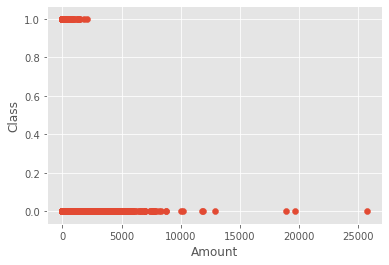

In [141]:
plt.scatter(table['Amount'], table['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

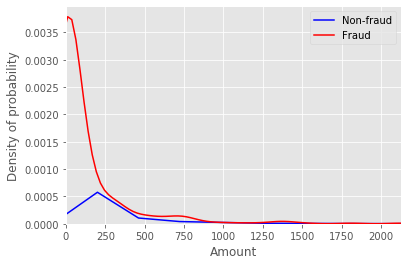

In [142]:
target_0 = table.loc[table['Class'] == 0]
target_1 = table.loc[table['Class'] == 1]
ax1=sns.distplot(target_0[['Amount']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['Amount']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(table[table['Class']==1]['Amount']))
ax2.set_xlim(0, max(table[table['Class']==1]['Amount']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.show()

Text(0, 0.5, 'Euro')

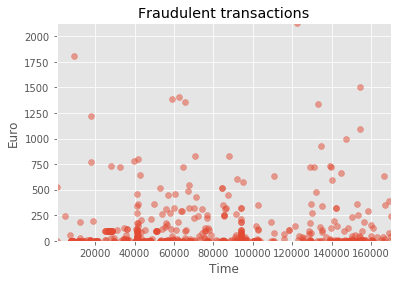

In [143]:
plt.scatter(table['Time'][table.Class==1], table['Amount'][table.Class==1], alpha=0.5)
plt.margins(0)
plt.title('Fraudulent transactions')
plt.xlabel('Time')
plt.ylabel('Euro')

Text(0, 0.5, 'Euro')

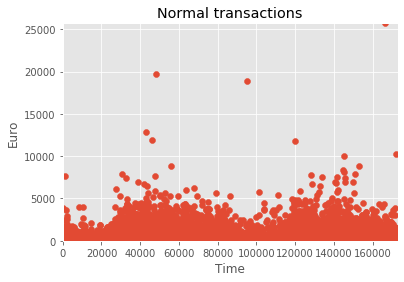

In [144]:
plt.scatter(table['Time'][table.Class==0], table['Amount'][table.Class==0])
plt.margins(0)
plt.title('Normal transactions')
plt.xlabel('Time')
plt.ylabel('Euro')

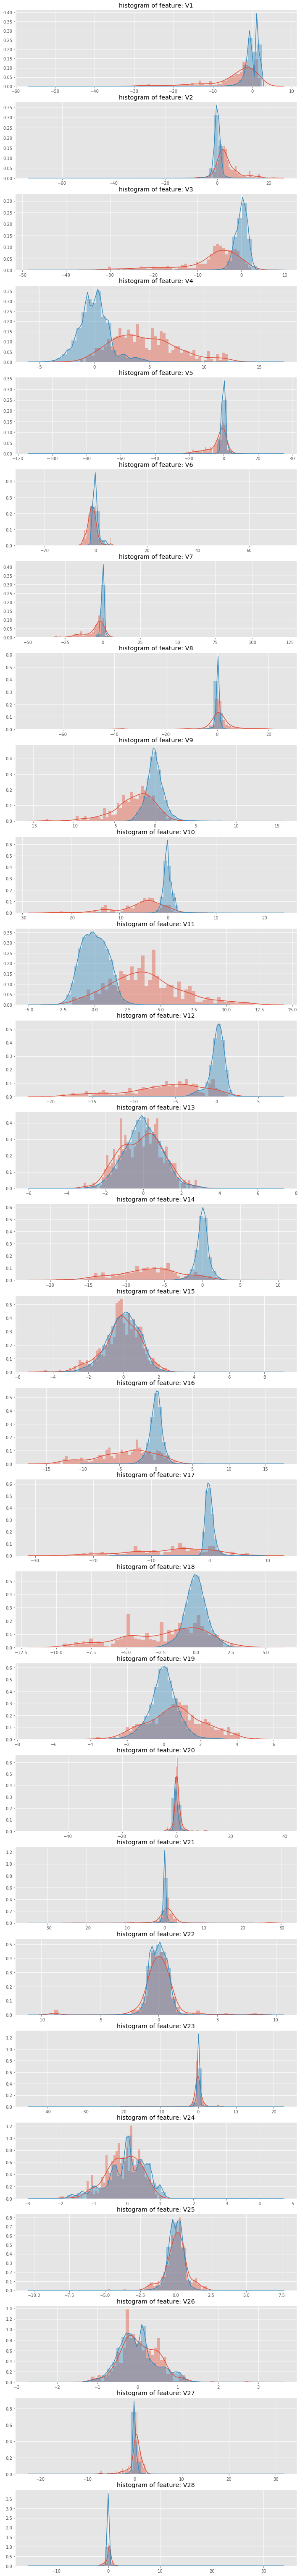

In [146]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(table[table.iloc[:, 1:29].columns]):
   ax = plt.subplot(gs[i])
   sns.distplot(table[cn][table.Class == 1], bins=50)
   sns.distplot(table[cn][table.Class == 0], bins=50)
   ax.set_xlabel('')
   ax.set_title('histogram of feature: ' + str(cn))
plt.show()

******************** COLUMN  Time  ***********************


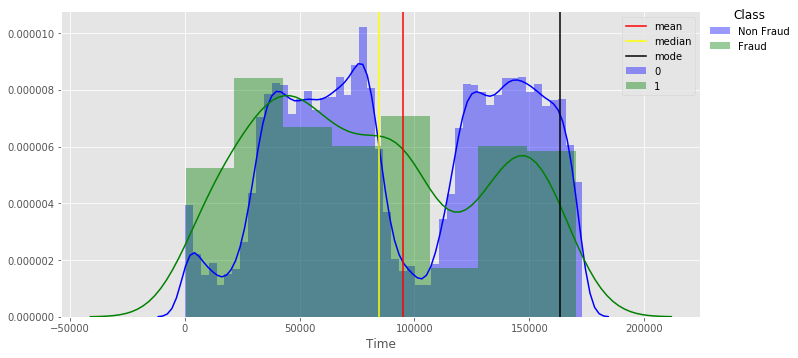

Standard Dev.= 47488.062585499334
Variance.= 2255116088.1243014
Range= 172792.0
 
******************** COLUMN  V1  ***********************


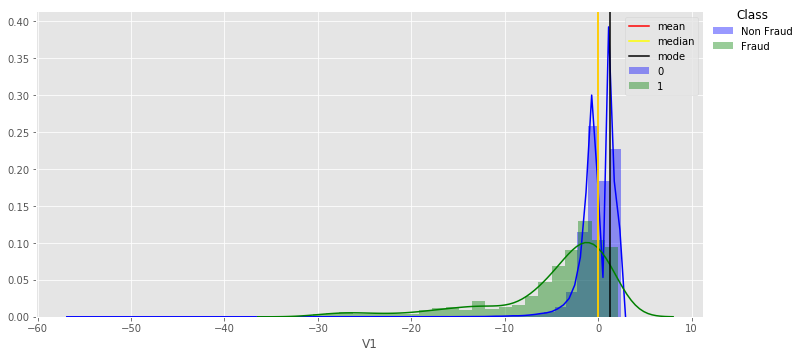

Standard Dev.= 1.9586923652174186
Variance.= 3.8364757815610053
Range= 58.86243962254021
 
******************** COLUMN  V2  ***********************


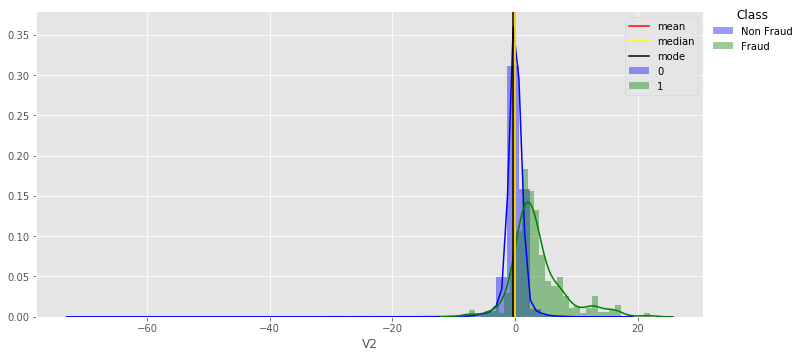

Standard Dev.= 1.6513056804786777
Variance.= 2.7268104503811483
Range= 94.7734565534212
 
******************** COLUMN  V3  ***********************


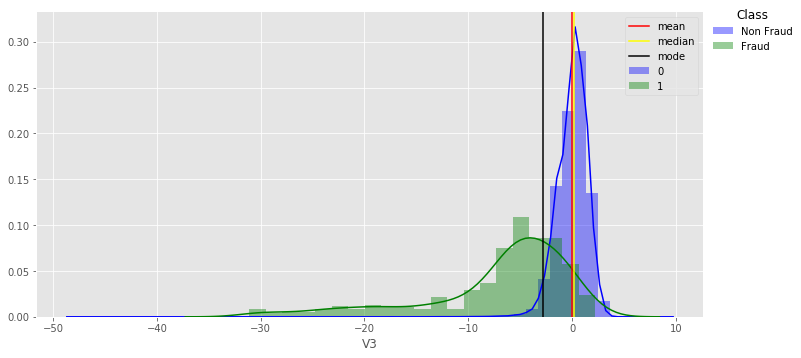

Standard Dev.= 1.5162523432763153
Variance.= 2.299021168490917
Range= 57.70814779521654
 
******************** COLUMN  V4  ***********************


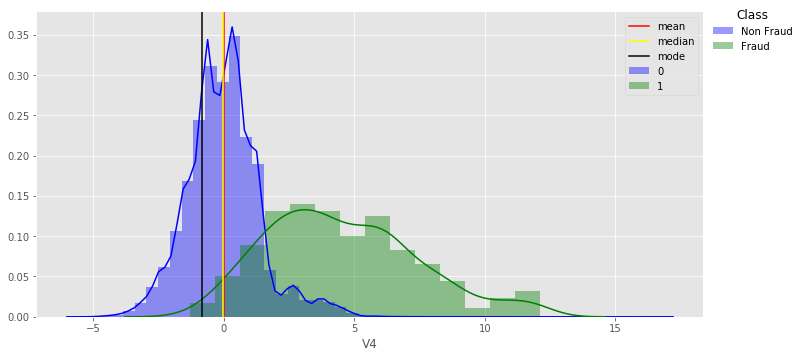

Standard Dev.= 1.4158660892755086
Variance.= 2.0046767827603227
Range= 22.55851523176745
 
******************** COLUMN  V5  ***********************


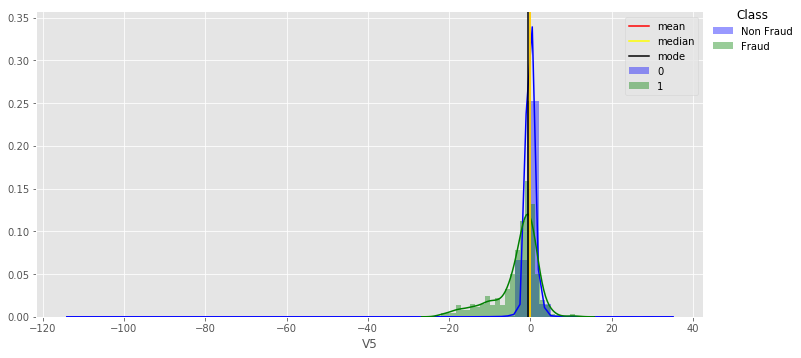

Standard Dev.= 1.38024431090289
Variance.= 1.9050743577797935
Range= 148.54497258781458
 
******************** COLUMN  V6  ***********************


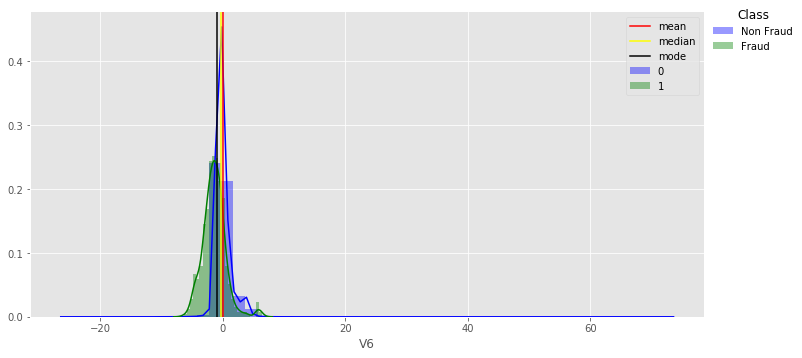

Standard Dev.= 1.3322687508539335
Variance.= 1.7749400245019
Range= 99.4621314818079
 
******************** COLUMN  V7  ***********************


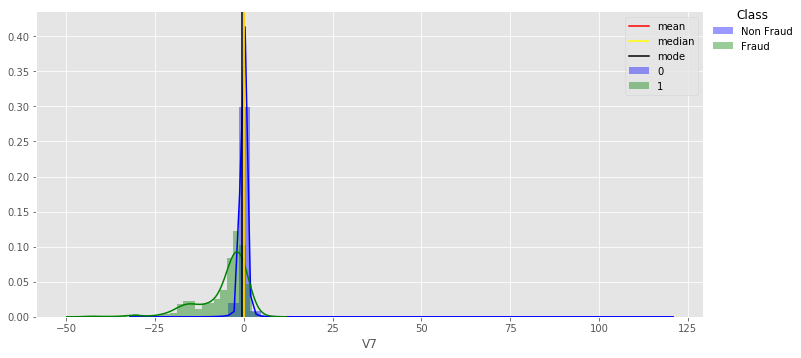

Standard Dev.= 1.2370914263703792
Variance.= 1.5303951971990992
Range= 164.1467355164831
 
******************** COLUMN  V8  ***********************


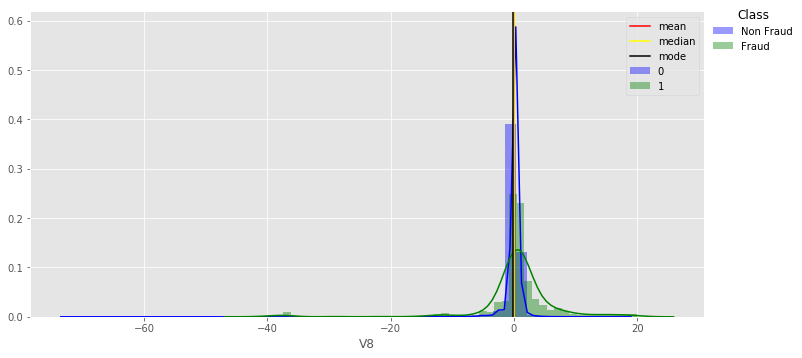

Standard Dev.= 1.1943508058914716
Variance.= 1.4264738475336076
Range= 93.22392682038871
 
******************** COLUMN  V9  ***********************


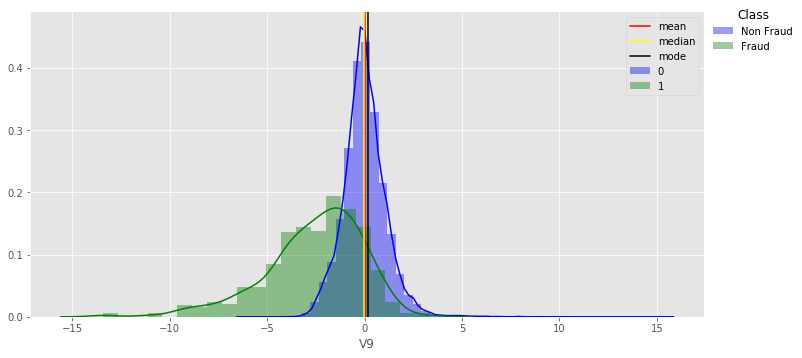

Standard Dev.= 1.0986301604917854
Variance.= 1.206988229542206
Range= 29.0290609253579
 
******************** COLUMN  V10  ***********************


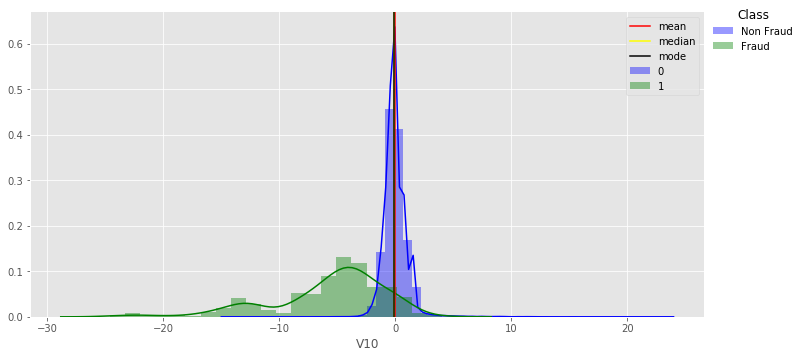

Standard Dev.= 1.0888478538435995
Variance.= 1.1855896488198128
Range= 48.333398557902
 
******************** COLUMN  V11  ***********************


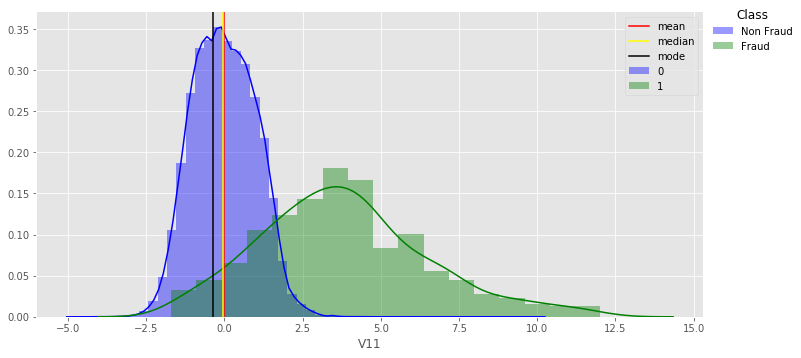

Standard Dev.= 1.0207112357718875
Variance.= 1.0418514268309738
Range= 16.81638664641747
 
******************** COLUMN  V12  ***********************


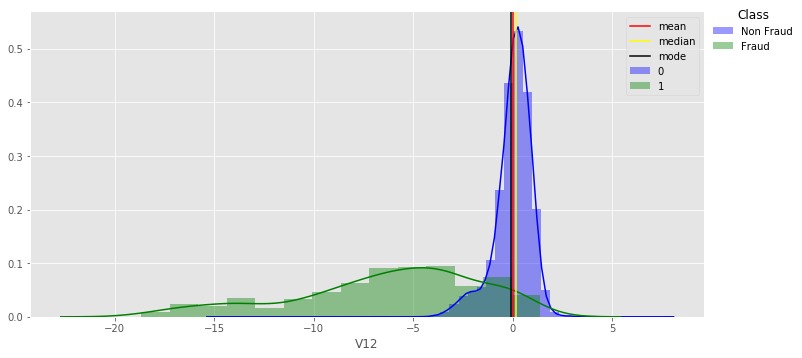

Standard Dev.= 0.9991996353557976
Variance.= 0.9983999112951588
Range= 26.5321067089889
 
******************** COLUMN  V13  ***********************


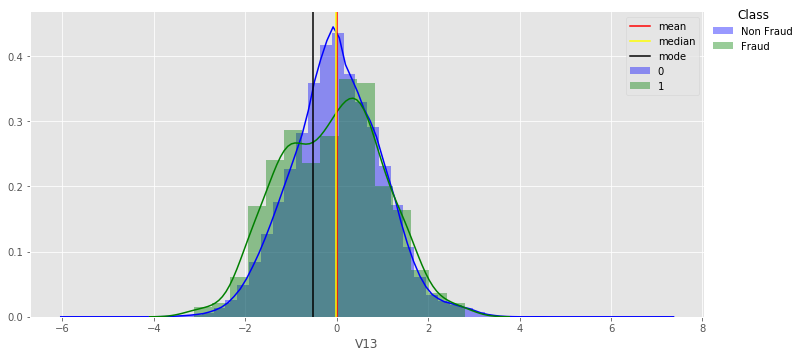

Standard Dev.= 0.9952724828452344
Variance.= 0.9905673151089174
Range= 12.918764164914599
 
******************** COLUMN  V14  ***********************


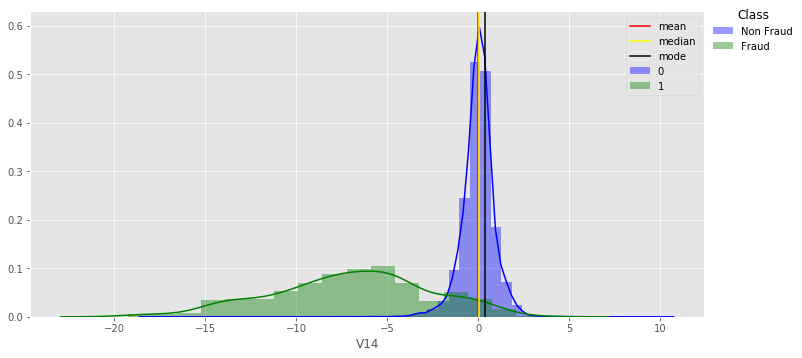

Standard Dev.= 0.9585939283692613
Variance.= 0.9189023195064124
Range= 29.7410915420461
 
******************** COLUMN  V15  ***********************


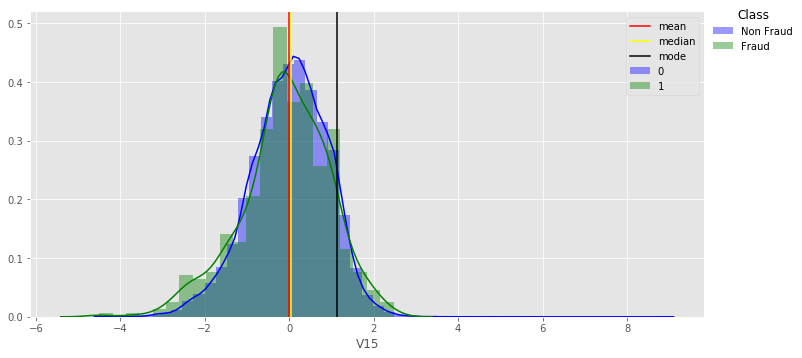

Standard Dev.= 0.915314404703279
Variance.= 0.837800459457318
Range= 13.37668627450898
 
******************** COLUMN  V16  ***********************


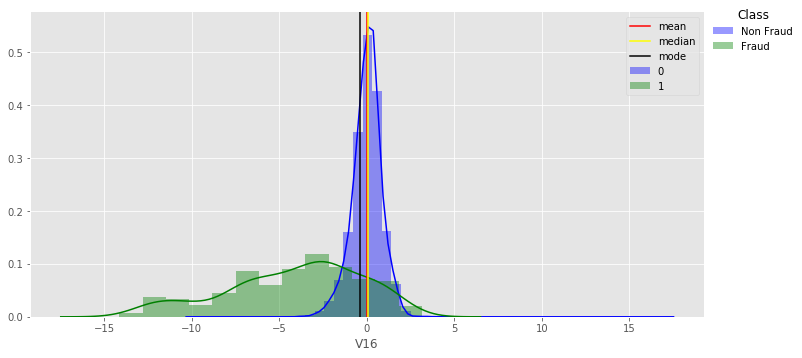

Standard Dev.= 0.876251349059508
Variance.= 0.7678164267286077
Range= 31.444966035120903
 
******************** COLUMN  V17  ***********************


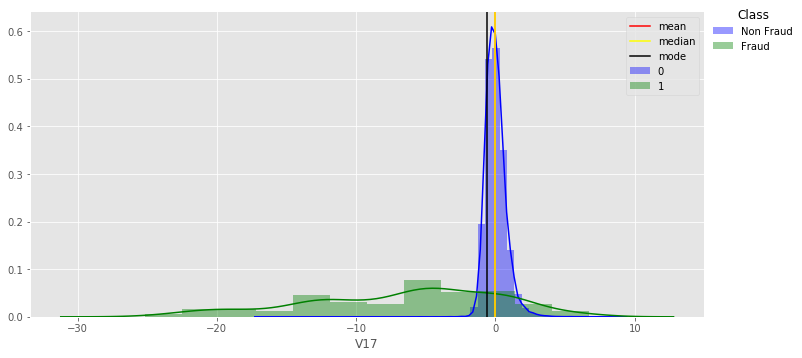

Standard Dev.= 0.8493355725983112
Variance.= 0.7213709148809011
Range= 34.41632561979765
 
******************** COLUMN  V18  ***********************


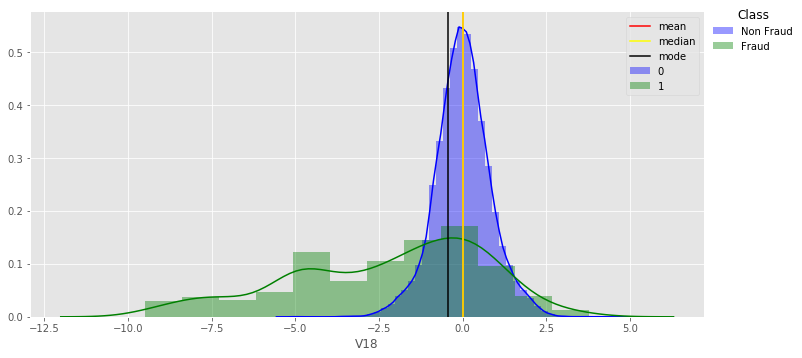

Standard Dev.= 0.8381747380464949
Variance.= 0.7025368914993104
Range= 14.539815106458608
 
******************** COLUMN  V19  ***********************


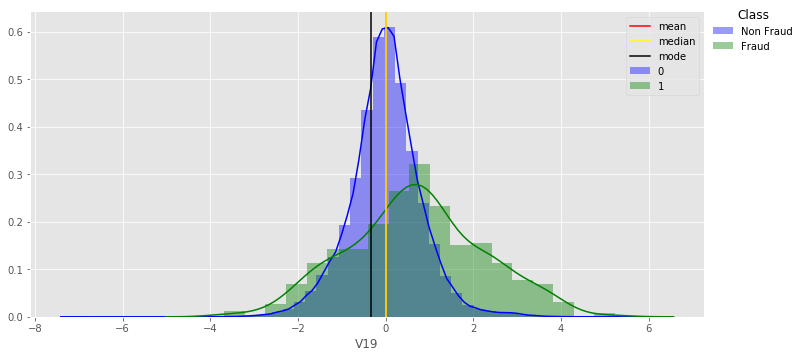

Standard Dev.= 0.814039071658312
Variance.= 0.6626596101863265
Range= 12.80549885751317
 
******************** COLUMN  V20  ***********************


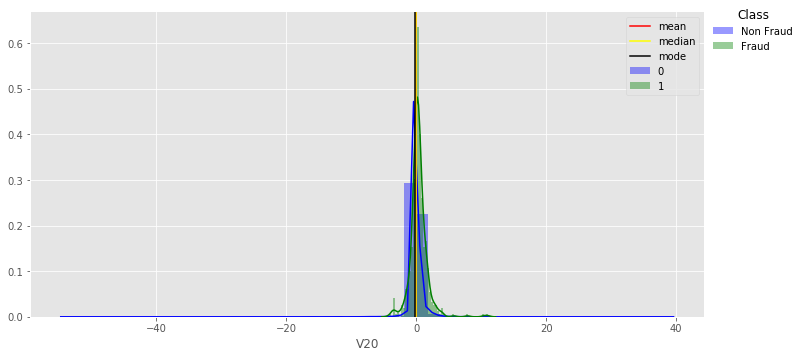

Standard Dev.= 0.7709236714693609
Variance.= 0.5943233072317992
Range= 93.91862474278591
 
******************** COLUMN  V21  ***********************


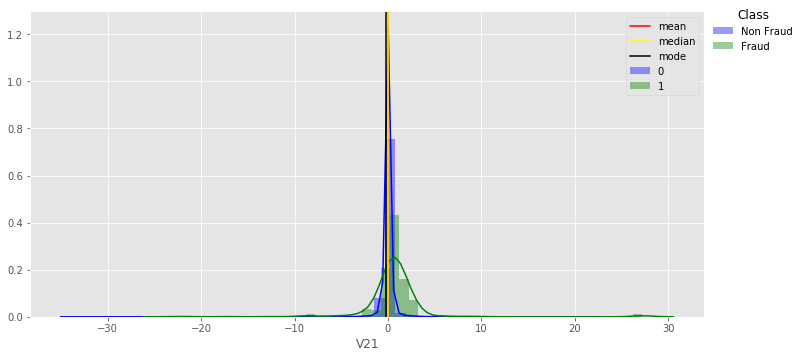

Standard Dev.= 0.7345227248583109
Variance.= 0.539523633333278
Range= 62.03322130213
 
******************** COLUMN  V22  ***********************


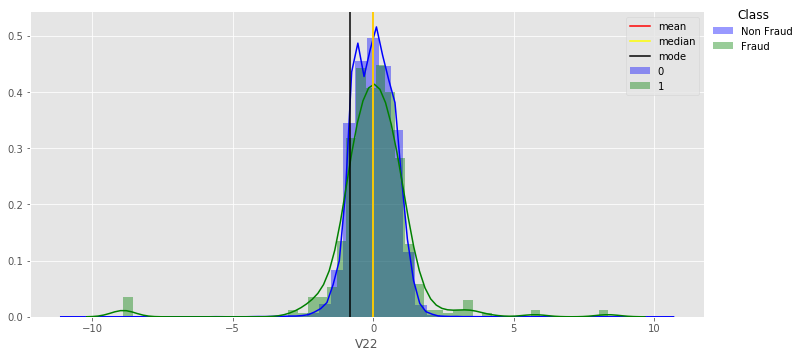

Standard Dev.= 0.7257002864164012
Variance.= 0.5266409057048467
Range= 21.4362337876004
 
******************** COLUMN  V23  ***********************


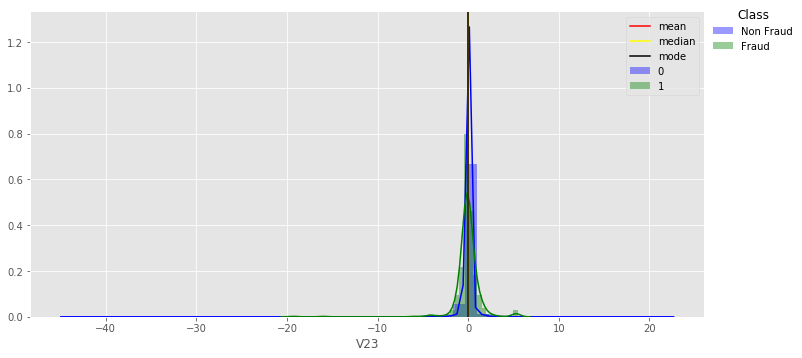

Standard Dev.= 0.624459199307252
Variance.= 0.3899492915994543
Range= 67.3361468935662
 
******************** COLUMN  V24  ***********************


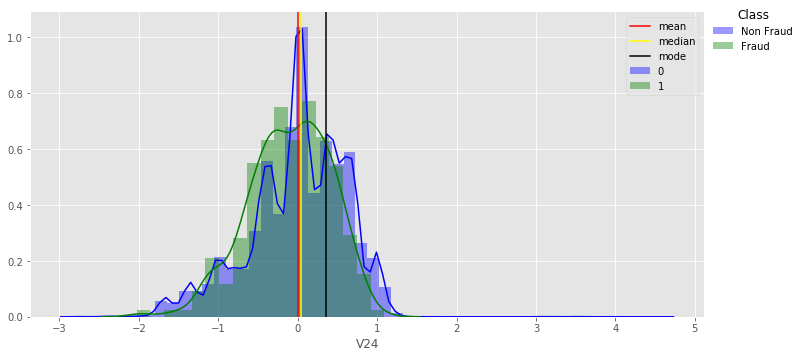

Standard Dev.= 0.60564600456748
Variance.= 0.36680708284855196
Range= 7.42117605560158
 
******************** COLUMN  V25  ***********************


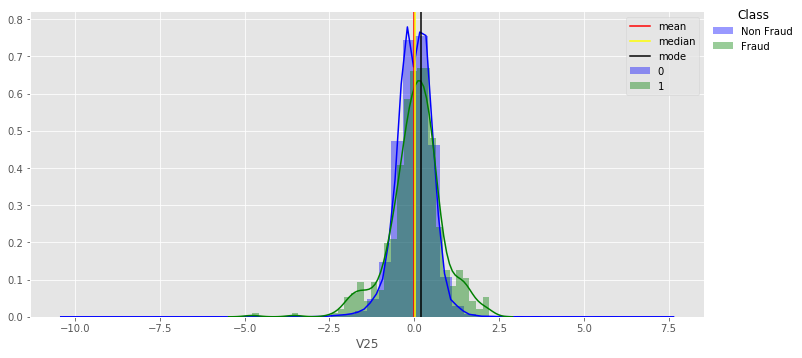

Standard Dev.= 0.5212771553974803
Variance.= 0.2717298727392889
Range= 17.81498575369426
 
******************** COLUMN  V26  ***********************


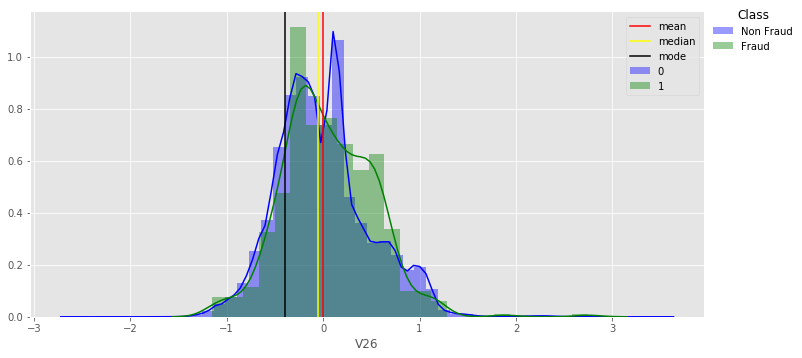

Standard Dev.= 0.48222616667470836
Variance.= 0.23254207582578362
Range= 6.12189616443197
 
******************** COLUMN  V27  ***********************


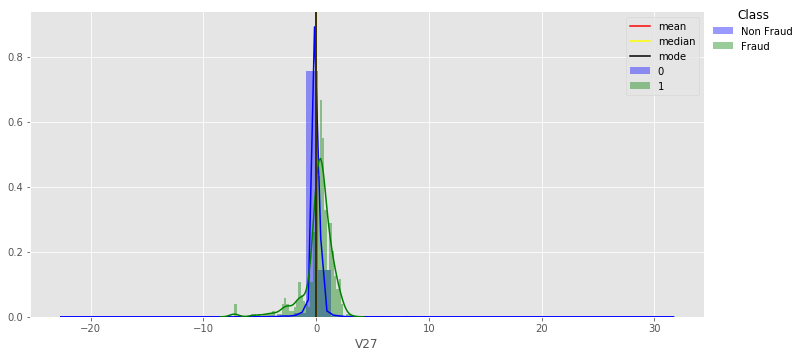

Standard Dev.= 0.4036317863573608
Variance.= 0.16291861895803414
Range= 54.177877426919004
 
******************** COLUMN  V28  ***********************


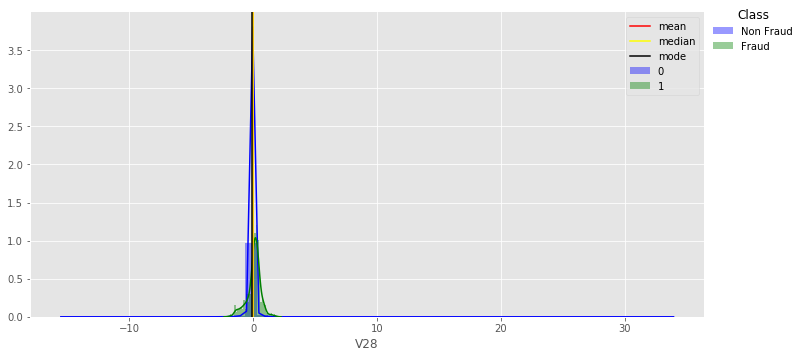

Standard Dev.= 0.3300826846738726
Variance.= 0.1089545787215112
Range= 49.277891724418
 
******************** COLUMN  Amount  ***********************


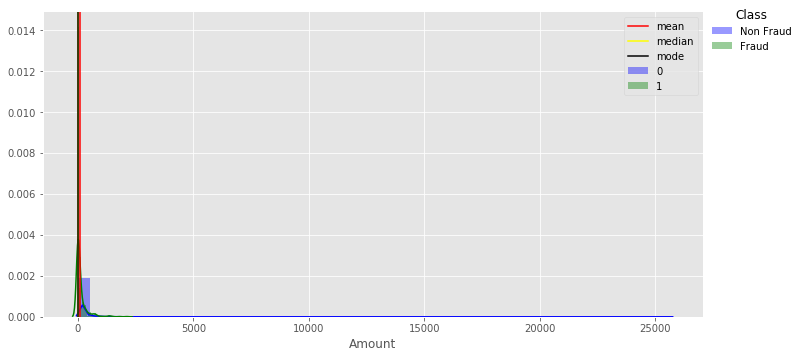

Standard Dev.= 250.11967013523534
Variance.= 62559.849388558934
Range= 25691.16
 


In [130]:
for c in table.columns[0:30]:
    print ("******************** COLUMN ",c," ***********************")
    col= table[c]
    col=np.array(col)
    col_mean= np.mean(col)
    col_median= np.median(col)
    col_mode= stats.mode(col)[0][0]
    col_std= np.std(col)
    col_var= np.var(col)
    col_range= col.max()-col.min()
    fig=sns.FacetGrid(table,hue="Class",height=5,aspect=2,palette=["blue", "green"])
    fig.map(sns.distplot,c)
    fig.add_legend(labels=['Non Fraud','Fraud'])
    plt.axvline(col_mean,color='red',label='mean')
    plt.axvline(col_median,color='yellow',label='median')
    plt.axvline(col_mode,color='black',label='mode')
    plt.legend()
    plt.show()
    print ("Standard Dev.=",col_std)
    print ("Variance.=",col_var)
    print ("Range=",col_range)
    print (" ")

In [122]:
table.loc[table['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

We can see below that all features have very low correlation coefficients among each other, and especially low correlation with the 'Class' feature. This was already expected since the data was processed using PCA.

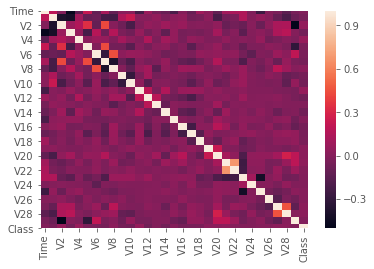

In [123]:
heatmap = sns.heatmap(table.corr(method='spearman'))

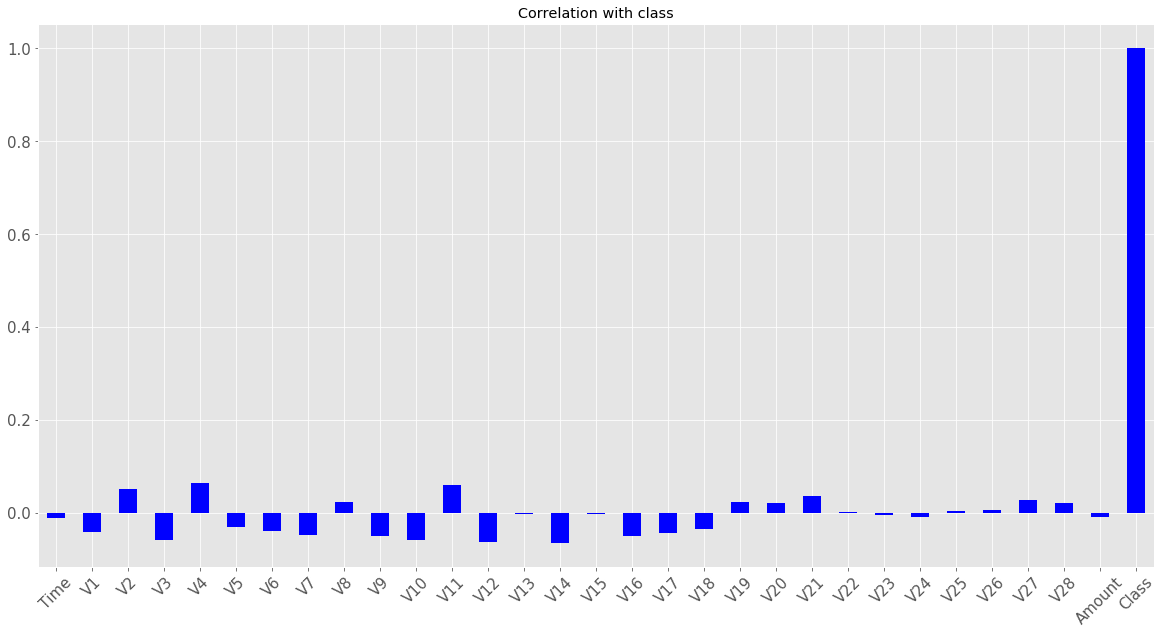

In [124]:
table.corrwith(table.Class, method='spearman').plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True, color=['blue'])
plt.show()

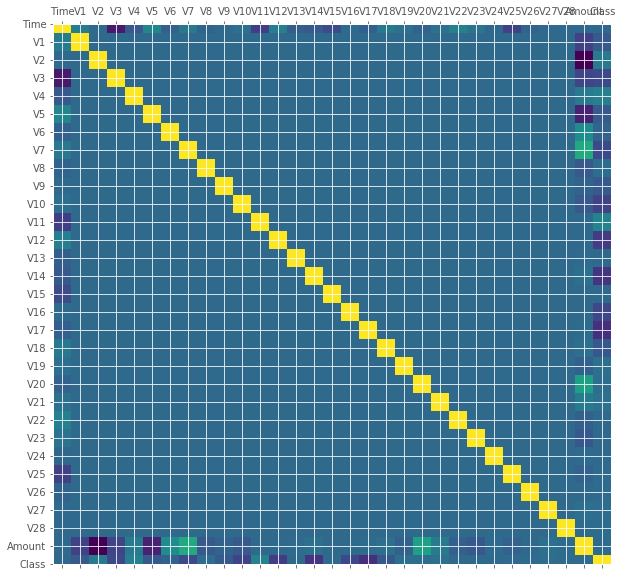

In [125]:
def plot_corr(table,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = table.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(table)

In [126]:
x_data = table.iloc[:, :-1]
y_data = table.iloc[:, -1]

print (table.shape)
print (x_data.shape)
print (y_data.shape)

(284807, 31)
(284807, 30)
(284807,)


In [127]:
x_data = x_data.drop('Time', 1)
x_data = x_data.drop('Amount', 1)

x_data_part_one = x_data.drop('V15', 1).drop('V16', 1).drop('V17', 1) \
    .drop('V18', 1).drop('V19', 1).drop('V20', 1).drop('V21', 1) \
    .drop('V22', 1).drop('V23', 1).drop('V24', 1).drop('V25', 1) \
    .drop('V26', 1).drop('V27', 1).drop('V28', 1)

x_data_part_two = x_data.drop('V1', 1).drop('V2', 1).drop('V3', 1) \
    .drop('V4', 1).drop('V5', 1).drop('V6', 1).drop('V7', 1) \
    .drop('V8', 1).drop('V9', 1).drop('V10', 1).drop('V11', 1) \
    .drop('V12', 1).drop('V13', 1).drop('V14', 1)

In [ ]:
x_data.head()

In [ ]:
# Function to plot all features of normal (max 1000 random)/fraud rows
def plot_features(x_data, is_fraud):
    exs = y_data.loc[y_data == is_fraud]
    if (exs.shape[0] > 1000):
        exs = exs.head(1000)
    plt.figure(figsize=(10, 10))
    for ex in range(exs.shape[0]):
        case = x_data.iloc[exs.index[ex]]
        case.plot(kind = 'line')

In [ ]:
# Plot all the fraud case features in two plots (V1-V14, V15-V28)
plot_features(x_data_part_one, 1)

Plot of features V1-V14 - Fraud cases

In [ ]:
plot_features(x_data_part_one, 0)

Plot of features V1-V14 - Normal cases

In [ ]:
plot_features(x_data_part_two, 1)

Plot of features V15-V28 - Fraud cases

In [ ]:
plot_features(x_data_part_two, 0)

Plot of features V15-V28 - Normal cases

We see that there are several key features in indicating that a transaction are fradulent: **V1, V2, V3, V4, V5, V7, V8, V10, V11, V12, V17**

In [ ]:
sns.set()
sns.pairplot(table, hue="Class", palette="husl")
plt.show();

**Balancing the classes**

Before balancing the classes, split the observations into a training set and a testing set. This is important. Otherwise the models might use part of the test data during the training which will lead to overfitting. 

In [ ]:
y = table['Class']
X = table.drop(columns=['Class'])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

**Resampling methods**
We are going to test three types of resampling methods

*   [Random undersampling](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler) - removing random records from majority class --> **loss of information**
*   [Random oversampling](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler) - duplicate random record from minority class --> **overfitting**
*   [SMOTE Synthetic Minority Over-sampling](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE)

**Resampling** - A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling / loss of information) and / or adding more examples from the minority class (over-sampling / overfitting). SMOTE is similar to oversampling but instead of copying the same original points randomly, the algorithm creates new points close to the original ones
![alt text](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). 





**Random undersampling**


In [ ]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=False)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# Checking If classes are balanced:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_rus)[0], Counter(y_rus)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_rus)[0]), (0.25, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_rus)[1]), (0.75, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [ ]:
assert Counter(y_rus)[1] == Counter(y_train)[1] #Checking if they have the same number of fraud cases

**Random oversampling**

In [ ]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# Checking If classes are balanced
plt.bar(['Non-Fraud','Fraud'], [Counter(y_ros)[0], Counter(y_ros)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_ros)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_ros)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [ ]:
assert Counter(y_ros)[0] == Counter(y_train)[0] #Checking if they have the same number of non-fraud cases

**Synthetic Minority Over-sampling (SMOTE)** SMOTE is similar to oversampling but instead of copying the same original points randomly, the algorithm creates new points close to the original ones.

it consists of synthesizing elements for the minority class using the existing ones. It randomly chooses a point from the minority class and computes the k-nearest neighbors (default = 5) for this point. The synthetic points are added between the chosen point and its neighbors by choosing a factor between 0 and 1 to multiply the distance. This process can be seen below.

![alt text](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_smote)[0], Counter(y_smote)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_smote)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_smote)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [ ]:
assert Counter(y_smote)[0] == Counter(y_train)[0] #Checking if they have the same number of non-fraud cases

**Checking the difference between random oversampling and SMOTE**

Because the dataset has many features and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA). But before using PCA, it is recommended to scale the features.

Let's create a function to perform feature scaling because some models need this prior to fitting and we can use it more than one time.

In [ ]:
def feature_scaling(X, X_test=X_test):
    std_scale = StandardScaler().fit(X)
    X_std = std_scale.transform(X)
    X_test_std = std_scale.transform(X_test)
    return X_std, X_test_std

In [ ]:
# Transforming all the sets using different types of sampling
X_rus_std, X_test_rus_std = feature_scaling(X_rus)
X_ros_std, X_test_ros_std = feature_scaling(X_ros)
X_smote_std, X_test_smote_std = feature_scaling(X_smote)

In [ ]:
pca = PCA(n_components=2)
X_ros_pca = pca.fit_transform(X_ros_std)
X_smote_pca = pca.fit_transform(X_smote_std)

In [ ]:
# Creating a function to visualize the data distribution after the PCA
def plot_2d_space(X, y, label='Classes'):
    '''Plots the data points in a 2D scatterplot.'''
    colors = ['blue', 'red']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0], X[y==l, 1], c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='best')
    plt.show()

In [ ]:
plot_2d_space(X_ros_pca, y_ros, 'Balanced dataset (2 PCA components) using random oversampling')
plot_2d_space(X_smote_pca, y_smote, 'Balanced dataset (2 PCA components) using SMOTE')

Now we can clearly see that new the observations tagged as 1 (fraudulent transactions) are present in different coordinates on the graphs above. This is the SMOTE algorithm works.

Also, by applying the PCA we can visualize the data in 2D and now we can see that the patterns for fraud and non-fraud transactions are distinct and each class has its own cluster.


**Metrics**

Usually accuracy is the first metric that comes to mind when someone is assessing a model performance. However, we must be careful. The data in this case is highly unbalanced, so accuracy is not a good metric at all. If we created a model that always classifies a transaction as non-fraudulent, we would have an astonishing accuracy of 99.83%! So, what is the solution? We should use other metrics to consider a model as good or bad.

The metrics to be used will be the Area Under the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) (also called AUC), and the [recall and precision scores](https://en.wikipedia.org/wiki/Precision_and_recall) obtained from the confusion matrix.

The ROC curve is a plot with the true positive rate on the y-axis and false positive rate on the x-axis. The true positive rate answers the question "When the actual classification is positive, how often does the classifier predict positive?" and the false positive rate answers the question "When the actual classification is negative, how often does the classifier incorrectly predict positive?"

The AUC shows how good the classifier is in separating the classes. The closer to 1, the better is the classifier.

Precision answers the question "what proportion of positive identifications was actually correct?" and recall answers "what proportion of actual positives was identified correctly?"

With these 3 metrics the we can to tell whether the model performance is good or poor.

**Models and Results**

The models to be used are shown below. There are also functions to plot the confusion matrix and the ROC curve for the models.

In [ ]:
classifiers = []

classifiers.append(('Logistic Regression', LogisticRegression(random_state=42)))
classifiers.append(('Naive Bayes', GaussianNB()))
classifiers.append(('KNN', KNeighborsClassifier()))
#classifiers.append(('SVM', SVC(random_state=42, probability=True))) #This one takes a very long time to run!
classifiers.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))
classifiers.append(('Random Forest', RandomForestClassifier(random_state=42)))

#Ensemble classifier - All classifiers have the same weight
eclf = VotingClassifier(estimators=classifiers, voting='soft', weights=np.ones(len(classifiers)))


The ensemble model used here is a [soft voting classifier](http://www.datajango.com/heterogeneous-ensemble-learning-hard-voting-soft-voting/) which puts the same weight to all individual classifiers' class probabilities. It was already proven in many competitions that classifiers that combine predictions from more than one single classifier can achieve a better performance.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test):
    '''Plots the ROC curve and the confusion matrix, and calculates AUC, recall and precision.'''
    
    name = classifier[0]
    classifier = classifier[1]

    mean_fpr = np.linspace(0, 1, 100)
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    
    #Obtain probabilities for each class
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' + name)
    plt.legend(loc="lower right")
    plt.show()
    
    #Store the confusion matrix result to plot a table later
    y_pred=classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cnf_matrix
    
    #Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy = {:2.2f}%'.format(accuracy*100))
    print('Precision = {:2.2f}%'.format(precision*100))
    print('Recall = {:2.2f}%'.format(recall*100))
    
    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

**Results - random undersampling**

In [ ]:
for clf in classifiers:
    plot_CM_and_ROC_curve(clf, X_rus_std, y_rus, X_test_rus_std, y_test)

In [ ]:
plot_CM_and_ROC_curve(('Ensemble model', eclf), X_rus_std, y_rus, X_test_rus_std, y_test)

**Results - oversampling**

In [ ]:
for clf in classifiers:
    plot_CM_and_ROC_curve(clf, X_ros_std, y_ros, X_test_ros_std, y_test)

In [ ]:
plot_CM_and_ROC_curve(('Ensemble model', eclf), X_ros_std, y_ros, X_test_ros_std, y_test)

**Results - SMOTE**

In [ ]:
for clf in classifiers:
    plot_CM_and_ROC_curve(clf, X_smote_std, y_smote, X_test_smote_std, y_test)

In [ ]:
plot_CM_and_ROC_curve(('Ensemble model', eclf), X_smote_std, y_smote, X_test_smote_std, y_test)

In [ ]:

**Conclusions**

When we used random undersampling the best model was a simple logistic regression with AUC = 0.9722, recall = 87.16% and precision = 7.94%. The number of false negatives, the worst possible classification regarding frauds, for the logistic regression was 19 out of 148 cases present in the test set. However, we can notice that the ensemble model (a soft voting combination of all simple models with the same weights) was the second best in this case with AUC = 0.9671 and 20 false negative cases, only 1 more than the logistic regression. We can also notice that in all models the number of false positives was pretty high. The best result was with logistic regression (1496 false positive cases). It's good to remember that when we use undersampling method, a lot of information is lost due to discarding part of the observations. Then, it was already expected a not very good result.

With the random oversampling method, we can verify the true power of ensemble models. Our ensemble model combined the best part of the simple models and could get a very high AUC (0.967), high precision (85.19%) and high recall (77.7%). Looking at the confusion matrix we can see the cases for false negative and false positive as 33 and 20, respectively. The logistic regression was the model with the lowest number of false negatives (only 18) and the random forest was the model with the lowest number of false positives (an astonishing result of only 3!). So, if we try to tweak the weights for each model in the ensemble model, we can achieve an even better result.

The analysis for SMOTE method is very similar to the random oversampling method. Again, we can see that the ensemble model could get the best parts of all simple models, resulting in a good performance. Once again, tweaking the weights for each simple model might be a way to enhance the result.

An interesting result is that in all cases of resampling, the highest AUC score among the simple models was using logistic regression. In my opinion, binary classification problems should have at least this model as a benchmark when the objective is to maximize the AUC.